<a href="https://colab.research.google.com/github/RiccardoRubini93/Garmin_data/blob/main/Read_Garmin_data_from_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install garminconnect

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for garminconnect: filename=garminconnect-0.1.55-py3-none-any.whl size=13622 sha256=b4037cd6d4f513d03125e0eee63ab4b1b2828adc7cad1e9d6b7055a7110bd004
  Stored in directory: /root/.cache/pip/wheels/8b/dc/11/9aa5c8473be40bed2c4032fded0fa7da63ff844b439681afcb
Successfully built garminconnect


In [2]:
from garminconnect import (
    Garmin,
    GarminConnectAuthenticationError,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
)

In [3]:
# Authenticate with Garmin Connect
client = Garmin("riru93@gmail.com", "P@ssw0rd")
client.login()

True

In [7]:
# Download a list of activities
activities = client.get_activities(0, 2)  # Download the first 10 activities

In [8]:
# Print the activity names and IDs
for activity in activities:
    print(activity["activityName"], activity["activityId"])

Cogorno Corsa 11917193188
Cogorno Corsa 11917192333


In [9]:
for activity in activities:

  activity_id = activity["activityId"]

  print(f"client.download_activity({activity_id}, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)")
  zip_data = client.download_activity(activity_id, dl_fmt=client.ActivityDownloadFormat.ORIGINAL)
  output_file = f"./{str(activity_id)}.zip"
  with open(output_file, "wb") as fb:
    fb.write(zip_data)
  print(f"Activity data downloaded to file {output_file}")

client.download_activity(11917193188, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11917193188.zip
client.download_activity(11917192333, dl_fmt=api.ActivityDownloadFormat.ORIGINAL)
Activity data downloaded to file ./11917192333.zip


In [ ]:
#TODO: implement a method that unpack the zip files and reads them into a dataframes

In [10]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to):
    """
    Unzip a .zip file to a specified directory.

    :param zip_file_path: Path to the .zip file to be extracted.
    :param extract_to: Directory where the contents of the .zip file will be extracted.
    :return: True if the extraction was successful, False otherwise.
    """
    try:
        # Create the destination directory if it doesn't exist
        os.makedirs(extract_to, exist_ok=True)

        # Open the .zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all files and directories
            zip_ref.extractall(extract_to)

        print(f"Successfully extracted {zip_file_path} to {extract_to}")
        return True
    except Exception as e:
        print(f"Error extracting {zip_file_path}: {str(e)}")
        return False

# Example usage:
zip_file_path = '11917192333.zip'  # Replace with the path to your .zip file
extract_to = 'unzipped_activity'  # Replace with the directory where you want to extract the contents
unzip_file(zip_file_path, extract_to)


Successfully extracted 11917192333.zip to unzipped_activity


True

In [11]:
pip install fitparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitparse: filename=fitparse-1.2.0-py3-none-any.whl size=68214 sha256=6fd3cbc873e5148ccba85f7243171ea1741591c32fb0552a18698707cc443ee4
  Stored in directory: /root/.cache/pip/wheels/81/67/7b/77a2f8ba348bafbbad6262a80bc51be27b2f9fccbaefc74671
Successfully built fitparse


In [59]:
def get_field_list():
  field_list =  [
      'accumulated_power',
      'activity_type',
      'cadence',
      'distance',
      'enhanced_altitude',
      'enhanced_speed' ,
      'fractional_cadence' ,
      'heart_rate',
      'position_lat',
      'position_long',
      'power',
      'stance_time',
      'stance_time_balance',
      'stance_time_percent',
      'step_length' ,
      'timestamp',
      'vertical_oscillation',
      'vertical_ratio' ,
      'unknown_107',
      'unknown_134',
      'unknown_135' ,
      'unknown_136' ,
      'unknown_140' ,
      'unknown_87',
  ]

  return field_list

In [55]:
import fitparse

# Open the .fit file
with fitparse.FitFile('unzipped_activity/11917192333_ACTIVITY.fit') as fitfile:

    # Get all data messages from the file
    messages = fitfile.messages

    # Get all data records from all messages
    data = [m for m in messages if m.name == 'record']

    # Get the fields we're interested in
    fields = get_field_list()

    # Create an empty list to hold our data
    data_list = []

    # Go through each record and extract the data
    for record in data:
        record_dict = {}
        for field in fields:
            value = record.get_value(field)
            record_dict[field] = value
        data_list.append(record_dict)

In [56]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data_list)

In [ ]:
df.head(20)

In [25]:
df['activity_type'].unique()

array(['running'], dtype=object)

In [61]:
import matplotlib.pyplot as plt

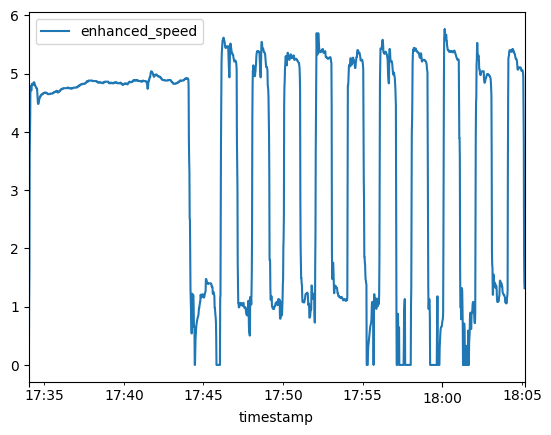

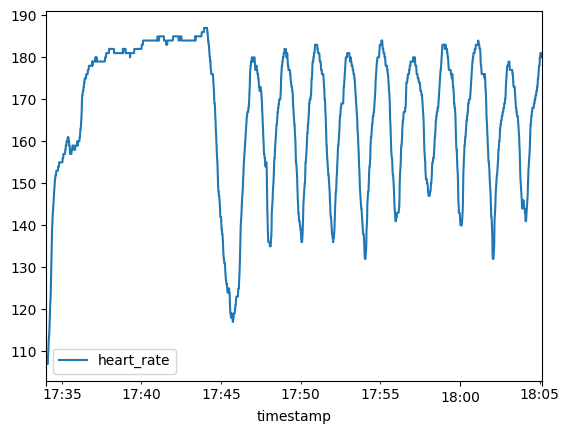

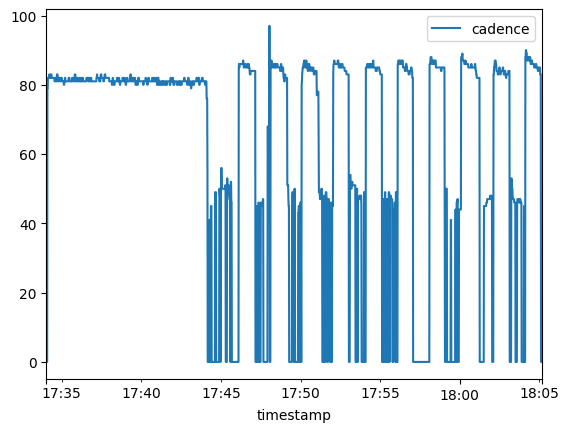

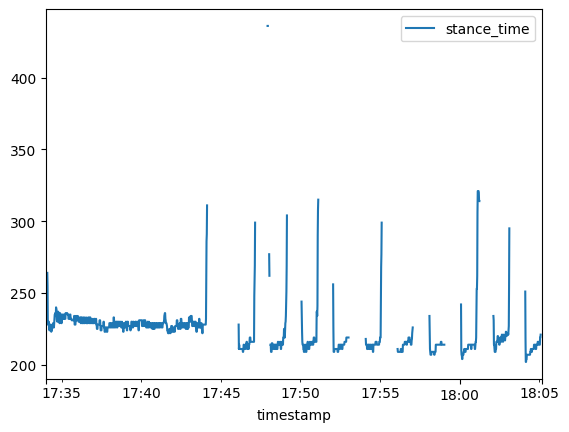

In [62]:
df.plot(x='timestamp', y='enhanced_speed', kind='line')
df.plot(x='timestamp', y='heart_rate', kind='line')
df.plot(x='timestamp', y='cadence', kind='line')
df.plot(x='timestamp', y='stance_time', kind='line')
plt.show()

In [63]:
corr_matrix = df.corr()

<ipython-input-63-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


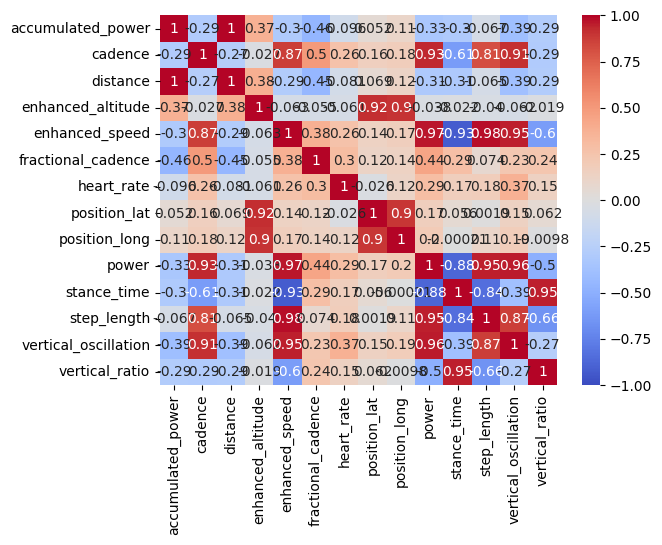

In [64]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the plot
plt.show()